In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import fbprophet

In [79]:
df = pd.read_csv('../../data/folkhalsomyndigheten_covid19.csv')
df = pd.read_excel('../../data/Folkhalsomyndigheten_Covid19.xlsx')
df = pd.read_excel('../../data/iva_kumulativ.xlsx')

In [156]:
bag = df.loc[df.Region == 'Region Stockholm'].drop(columns='Region')
test = pd.DataFrame(columns=['ds', 'y'])
test['ds'] = bag.loc[10].index
test['y'] = bag.loc[10].values

In [64]:
test = df[['Statistikdatum', 'Stockholm']].rename(columns={'Statistikdatum': 'ds', 'Stockholm': 'y'})

In [138]:
from fbprophet import Prophet
model = Prophet()

In [139]:
model.fit(test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


In [140]:
future_dates = model.make_future_dataframe(periods=10)

In [141]:
pred = model.predict(future_dates)

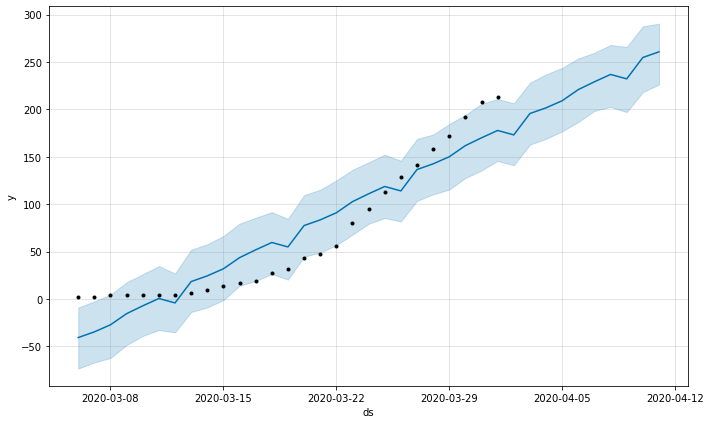

In [155]:
plot = model.plot(pred)
plt.savefig('prophet_iva.png')

In [157]:
#pred[['ds','yhat']]

In [158]:
#model.plot_components(pred)